In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
escsdata=pd.read_csv('escs_trend.csv')
escsdata.head(5)

,cycnt,cycle,cnt,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,05ARE,5,ARE,1,1,0,0.3226,82.410004,-0.351700,16.0
1,05ARE,5,ARE,1,2,0,0.0598,NaN,0.010140,16.0
2,05ARE,5,ARE,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,05ARE,5,ARE,1,4,0,0.4869,81.400002,0.725674,12.0
4,05ARE,5,ARE,1,5,0,-0.5238,63.029999,-0.105597,12.0


In [3]:
escsdata.dtypes

cycnt              object
cycle               int64
cnt                object
schoolid            int64
studentid           int64
oecd                int64
escs_trend        float64
hisei_trend       float64
homepos_trend     float64
paredint_trend    float64
dtype: object

In [4]:
escsdata.isna().sum()

cycnt                 0
cycle                 0
cnt                   0
schoolid              0
studentid             0
oecd                  0
escs_trend        34731
hisei_trend       96525
homepos_trend     28662
paredint_trend    55081
dtype: int64

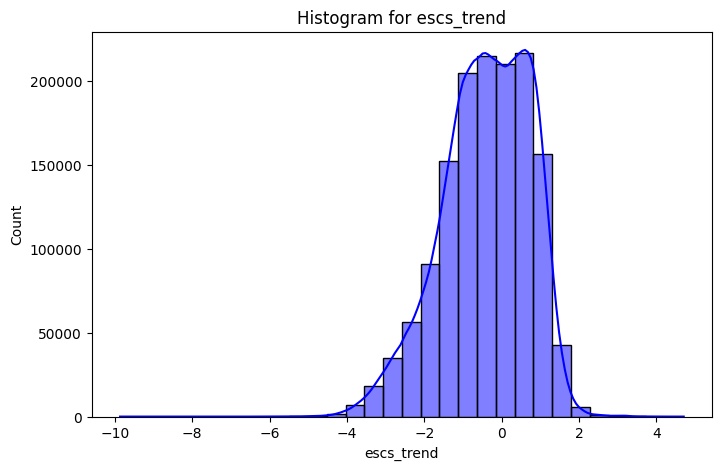

In [5]:
#using a histogram
plt.figure(figsize=(8,5))
sb.histplot(escsdata['escs_trend'],bins=30,kde=True,color='blue')
plt.title('Histogram for escs_trend')
plt.show()

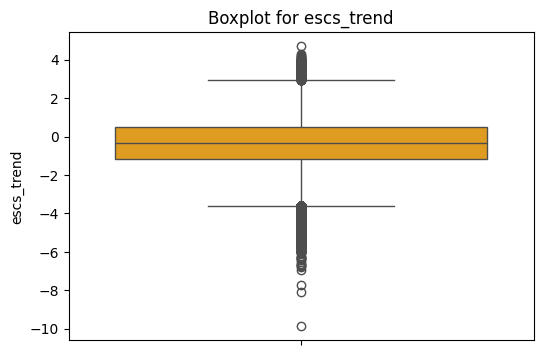

In [6]:
#using a boxplot
plt.figure(figsize=(6,4))
sb.boxplot(escsdata['escs_trend'],color='orange')
plt.title('Boxplot for escs_trend')
plt.show()

In [7]:
#separating categorical from continuous
contescs=escsdata.select_dtypes(include=['int64','float64'])
contescs

,cycle,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,5,1,1,0,0.3226,82.410004,-0.351700,16.0
1,5,1,2,0,0.0598,NaN,0.010140,16.0
2,5,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,5,1,4,0,0.4869,81.400002,0.725674,12.0
4,5,1,5,0,-0.5238,63.029999,-0.105597,12.0
...,...,...,...,...,...,...,...,...
1447782,7,152,5094,0,-2.0618,51.560001,-0.488860,6.0
1447783,7,152,5205,0,-1.0211,51.560001,-0.457206,12.0
1447784,7,152,5219,0,-3.0736,27.910000,-1.196708,6.0
1447785,7,152,5253,0,-1.7683,33.759998,-0.972096,12.0


In [8]:
catescs=escsdata.select_dtypes(include=['object'])
catescs

,cycnt,cnt
0,05ARE,ARE
1,05ARE,ARE
2,05ARE,ARE
3,05ARE,ARE
4,05ARE,ARE
...,...,...
1447782,07VNM,VNM
1447783,07VNM,VNM
1447784,07VNM,VNM
1447785,07VNM,VNM


In [9]:
catescs.isna().sum()

cycnt    0
cnt      0
dtype: int64

In [10]:
contescs.isna().sum()

cycle                 0
schoolid              0
studentid             0
oecd                  0
escs_trend        34731
hisei_trend       96525
homepos_trend     28662
paredint_trend    55081
dtype: int64

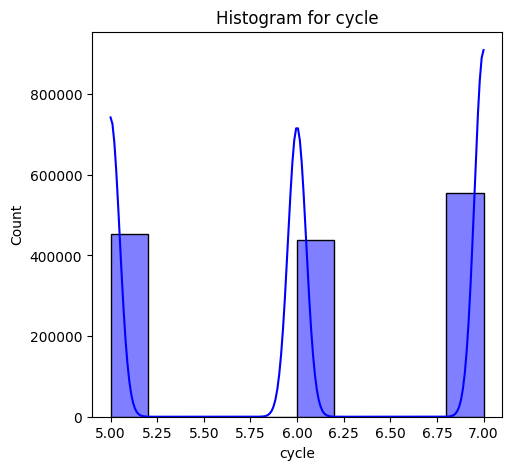

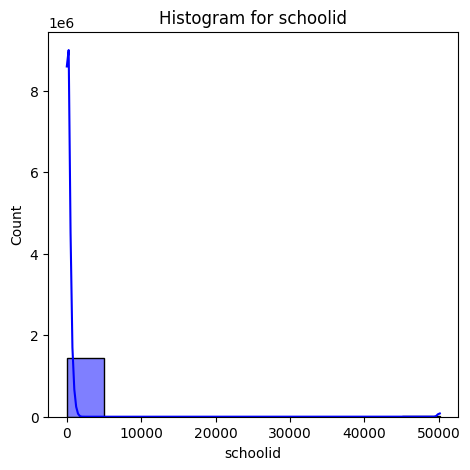

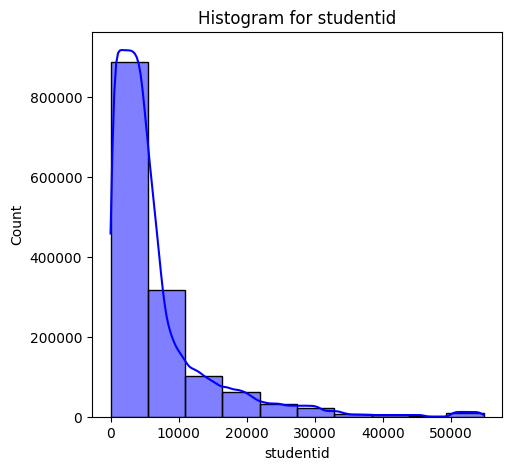

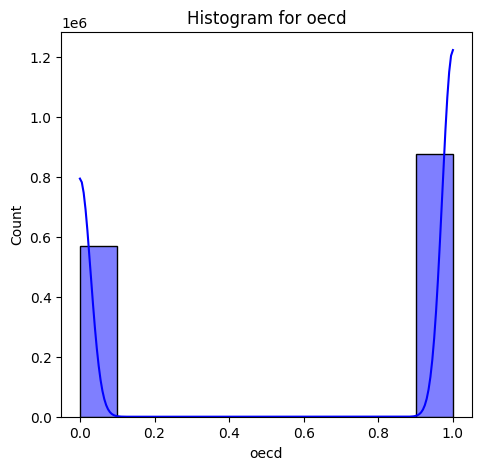

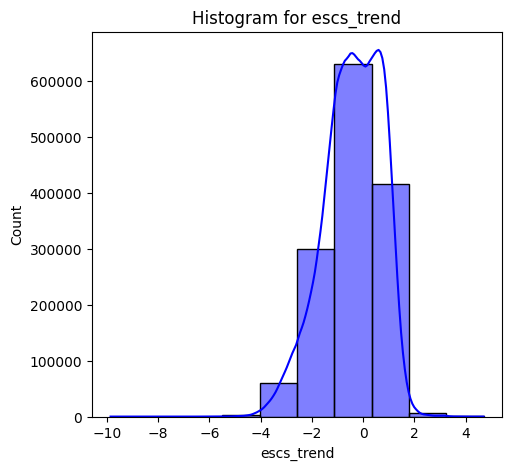

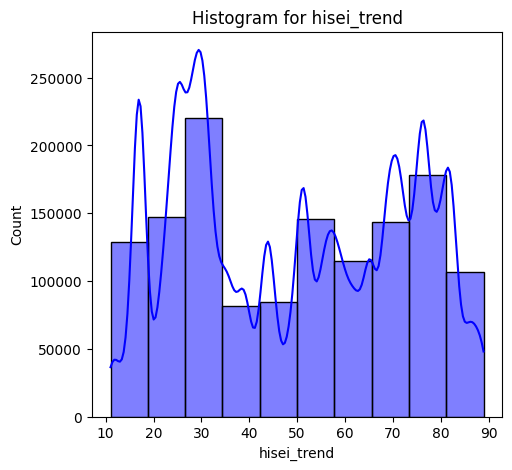

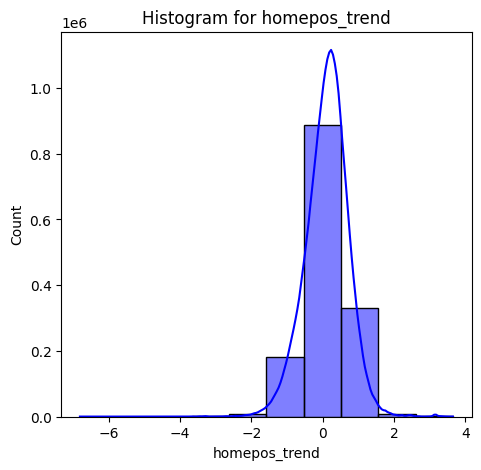

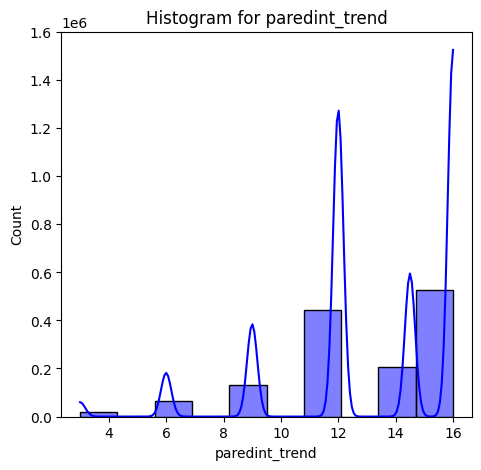

In [11]:
#using a histogram to check for skewness or normalization
for col in contescs:
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    sb.histplot(contescs[col],bins=10,kde=True,color='Blue')
    plt.title(f'Histogram for {col}')
    plt.show()


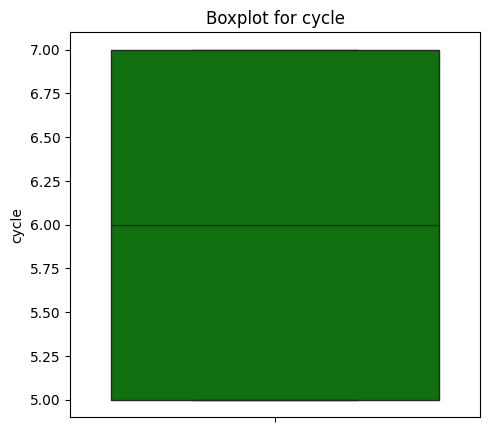

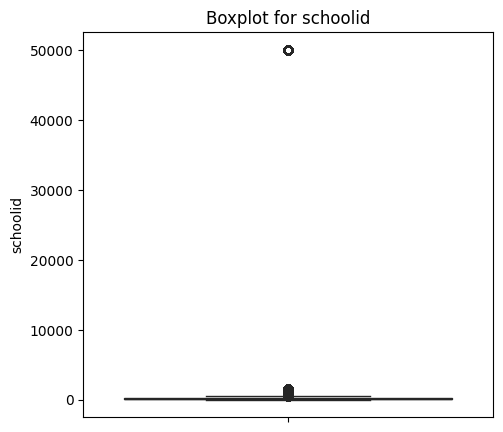

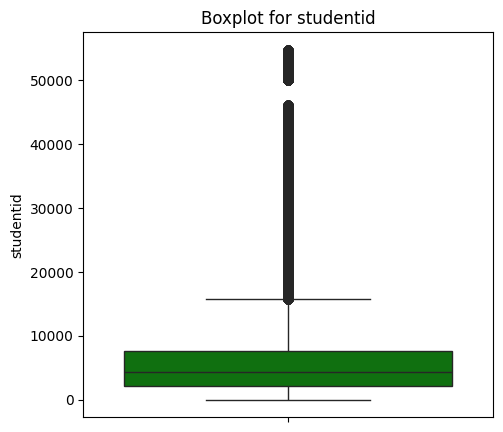

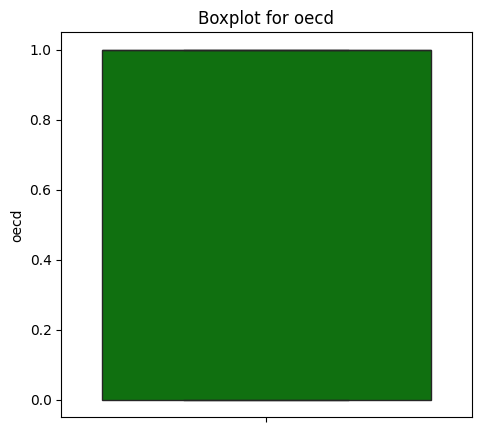

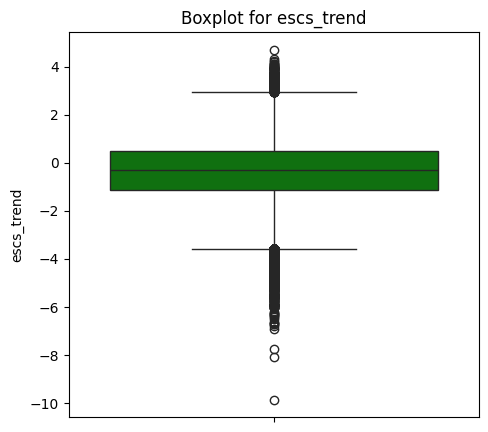

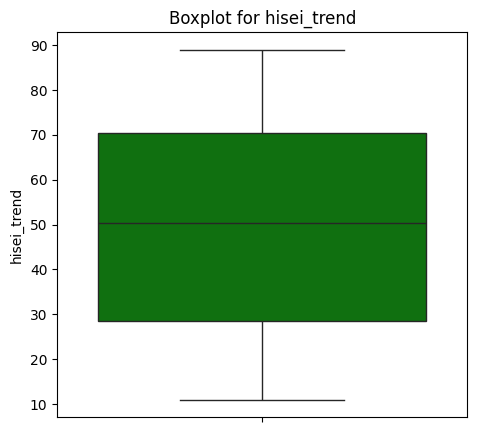

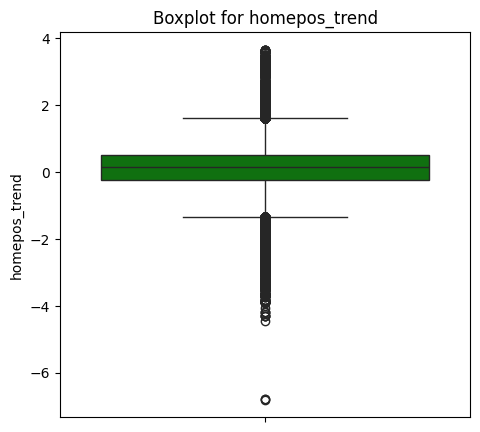

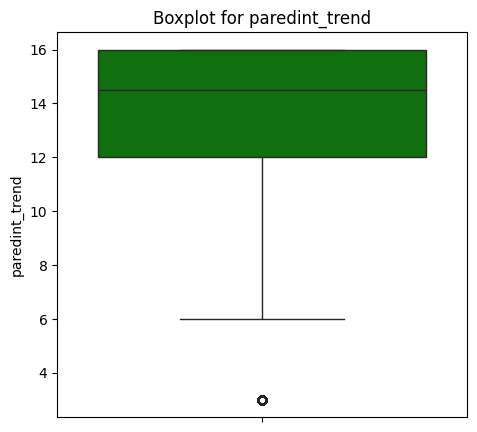

In [12]:
#using a boxplot
for col in contescs:
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,2)
    sb.boxplot(contescs[col],color='green')
    plt.title(f'Boxplot for {col}')
    plt.show()

escs_trend and homepos_trend will be imputed with mean
paredint_trend and hisei_trend will be imputed with median

In [13]:
#mean imputation
contescs['escs_trend']=contescs['escs_trend'].fillna(contescs['escs_trend'].mean())
contescs['homepos_trend']=contescs['homepos_trend'].fillna(contescs['homepos_trend'].mean())
contescs


,cycle,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,5,1,1,0,0.3226,82.410004,-0.351700,16.0
1,5,1,2,0,0.0598,NaN,0.010140,16.0
2,5,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,5,1,4,0,0.4869,81.400002,0.725674,12.0
4,5,1,5,0,-0.5238,63.029999,-0.105597,12.0
...,...,...,...,...,...,...,...,...
1447782,7,152,5094,0,-2.0618,51.560001,-0.488860,6.0
1447783,7,152,5205,0,-1.0211,51.560001,-0.457206,12.0
1447784,7,152,5219,0,-3.0736,27.910000,-1.196708,6.0
1447785,7,152,5253,0,-1.7683,33.759998,-0.972096,12.0


In [14]:
contescs.isna().sum()

cycle                 0
schoolid              0
studentid             0
oecd                  0
escs_trend            0
hisei_trend       96525
homepos_trend         0
paredint_trend    55081
dtype: int64

In [15]:
#median imputation
contescs['hisei_trend']=contescs['hisei_trend'].fillna(contescs['hisei_trend'].median())
contescs['paredint_trend']=contescs['paredint_trend'].fillna(contescs['paredint_trend'].median())
contescs

,cycle,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,5,1,1,0,0.3226,82.410004,-0.351700,16.0
1,5,1,2,0,0.0598,50.369999,0.010140,16.0
2,5,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,5,1,4,0,0.4869,81.400002,0.725674,12.0
4,5,1,5,0,-0.5238,63.029999,-0.105597,12.0
...,...,...,...,...,...,...,...,...
1447782,7,152,5094,0,-2.0618,51.560001,-0.488860,6.0
1447783,7,152,5205,0,-1.0211,51.560001,-0.457206,12.0
1447784,7,152,5219,0,-3.0736,27.910000,-1.196708,6.0
1447785,7,152,5253,0,-1.7683,33.759998,-0.972096,12.0


In [16]:
contescs.isna().sum()

cycle             0
schoolid          0
studentid         0
oecd              0
escs_trend        0
hisei_trend       0
homepos_trend     0
paredint_trend    0
dtype: int64

In [17]:
#handling outliers
#using IQR
Q1=escsdata['escs_trend'].quantile(0.25)
Q3=escsdata['escs_trend'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=escsdata[(escsdata['escs_trend']<lower_bound) |(escsdata['escs_trend']>upper_bound)]
outliers

,cycnt,cycle,cnt,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
1218,05ARE,5,ARE,48,1219,0,-3.9194,17.000000,-1.362246,3.0
1865,05ARE,5,ARE,72,1866,0,-3.9008,17.000000,-1.338850,3.0
2159,05ARE,5,ARE,88,2160,0,-3.7796,17.000000,-1.187058,3.0
3099,05ARE,5,ARE,124,3100,0,-4.2663,NaN,-0.665878,3.0
3183,05ARE,5,ARE,128,3184,0,-3.5972,17.000000,-0.958631,3.0
...,...,...,...,...,...,...,...,...,...,...
1447566,07VNM,7,VNM,147,4634,0,-3.7210,11.560000,-1.620893,6.0
1447568,07VNM,7,VNM,147,4777,0,-3.8683,11.560000,-1.169537,3.0
1447627,07VNM,7,VNM,149,1890,0,-3.7074,11.560000,-0.968023,3.0
1447701,07VNM,7,VNM,151,64,0,-3.7746,17.690001,-1.197222,3.0


In [18]:
#dropping the outliers
droppeddata=escsdata[(escsdata['escs_trend']>=lower_bound)&(escsdata['escs_trend']<=upper_bound)]
droppeddata

,cycnt,cycle,cnt,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,05ARE,5,ARE,1,1,0,0.3226,82.410004,-0.351700,16.0
1,05ARE,5,ARE,1,2,0,0.0598,NaN,0.010140,16.0
2,05ARE,5,ARE,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,05ARE,5,ARE,1,4,0,0.4869,81.400002,0.725674,12.0
4,05ARE,5,ARE,1,5,0,-0.5238,63.029999,-0.105597,12.0
...,...,...,...,...,...,...,...,...,...,...
1447782,07VNM,7,VNM,152,5094,0,-2.0618,51.560001,-0.488860,6.0
1447783,07VNM,7,VNM,152,5205,0,-1.0211,51.560001,-0.457206,12.0
1447784,07VNM,7,VNM,152,5219,0,-3.0736,27.910000,-1.196708,6.0
1447785,07VNM,7,VNM,152,5253,0,-1.7683,33.759998,-0.972096,12.0


In [19]:
Q1=escsdata['hisei_trend'].quantile(0.25)
Q3=escsdata['hisei_trend'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=escsdata[(escsdata['hisei_trend']<lower_bound) |(escsdata['hisei_trend']>upper_bound)]

In [20]:
import numpy as np

In [21]:
#replacing outliers with mean
mean=escsdata['hisei_trend'].mean()
print(mean)
escsdata['hisei_trend']=np.where((escsdata['hisei_trend']<lower_bound) |(escsdata['hisei_trend']>upper_bound),mean,escsdata['hisei_trend'])

49.3706326441275


In [22]:
escsdata.info

<bound method DataFrame.info of          cycnt  cycle  cnt  schoolid  studentid  oecd  escs_trend  \
0        05ARE      5  ARE         1          1     0      0.3226   
1        05ARE      5  ARE         1          2     0      0.0598   
2        05ARE      5  ARE         1          3     0     -0.8984   
3        05ARE      5  ARE         1          4     0      0.4869   
4        05ARE      5  ARE         1          5     0     -0.5238   
...        ...    ...  ...       ...        ...   ...         ...   
1447782  07VNM      7  VNM       152       5094     0     -2.0618   
1447783  07VNM      7  VNM       152       5205     0     -1.0211   
1447784  07VNM      7  VNM       152       5219     0     -3.0736   
1447785  07VNM      7  VNM       152       5253     0     -1.7683   
1447786  07VNM      7  VNM       152       5478     0     -0.5760   

         hisei_trend  homepos_trend  paredint_trend  
0          82.410004      -0.351700            16.0  
1                NaN       0.01

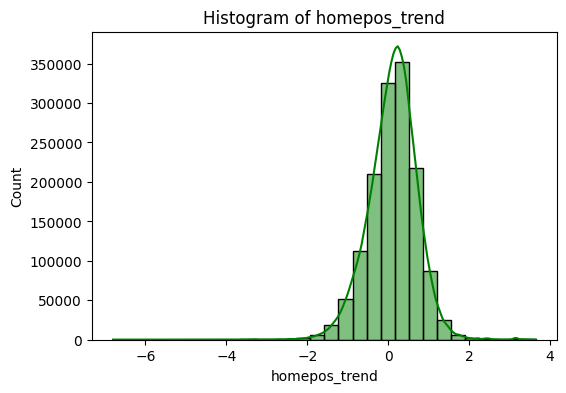

In [23]:
#univariate analysis
#continuous
plt.figure(figsize=(6,4))
sb.histplot(escsdata['homepos_trend'],bins=30,kde=True,color='green')
plt.title("Histogram of homepos_trend")
plt.show()

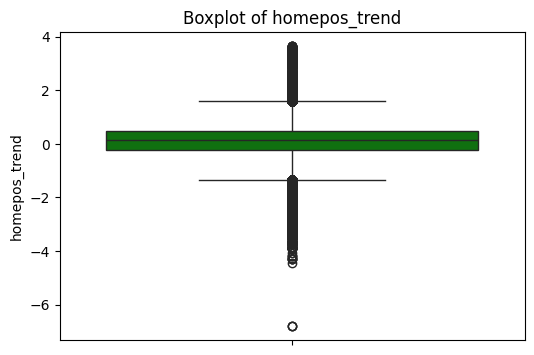

In [24]:
#boxplot
plt.figure(figsize=(6,4))
sb.boxplot(escsdata['homepos_trend'],color='green')
plt.title("Boxplot of homepos_trend")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25500\2773015816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(escsdata['cycnt'],palette='viridis')


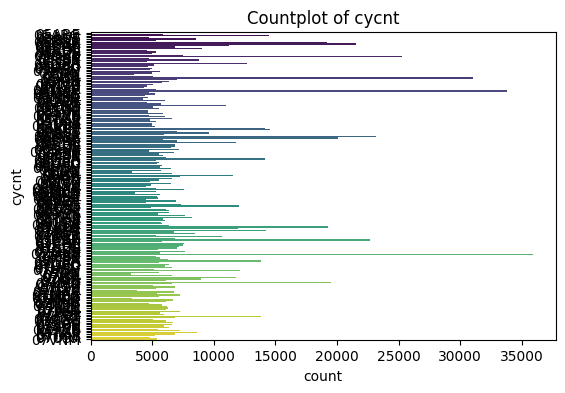

In [25]:
#using a barplot / countplot for categorical data
plt.figure(figsize=(6,4))
sb.countplot(escsdata['cycnt'],palette='viridis')
plt.title("Countplot of cycnt")
plt.show()

In [26]:
escsdata.dtypes

cycnt              object
cycle               int64
cnt                object
schoolid            int64
studentid           int64
oecd                int64
escs_trend        float64
hisei_trend       float64
homepos_trend     float64
paredint_trend    float64
dtype: object

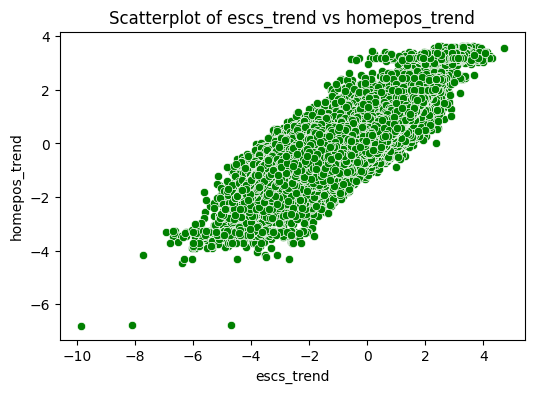

In [27]:
#bivariate analysis
#cont vs cont
plt.figure(figsize=(6,4))
sb.scatterplot(data=escsdata,x='escs_trend',y='homepos_trend', color='green')
plt.title('Scatterplot of escs_trend vs homepos_trend')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25500\1323127773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y=escsdata['homepos_trend'],x=escsdata['cycnt'],palette='viridis')


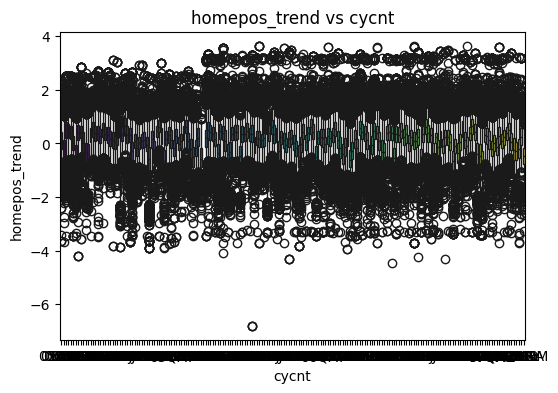

In [28]:
#cont vs cat
plt.figure(figsize=(6,4))
sb.boxplot(y=escsdata['homepos_trend'],x=escsdata['cycnt'],palette='viridis')
plt.title('homepos_trend vs cycnt')
plt.xlabel('cycnt')
plt.ylabel('homepos_trend')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sb.countplot(escsdata['homepos_trend','cycnt'],palette='viridis')
plt.title("homepos_trend vs cycnt")
plt.xlabel('cycnt')
plt.ylabel('homepos_trend')
plt.show()

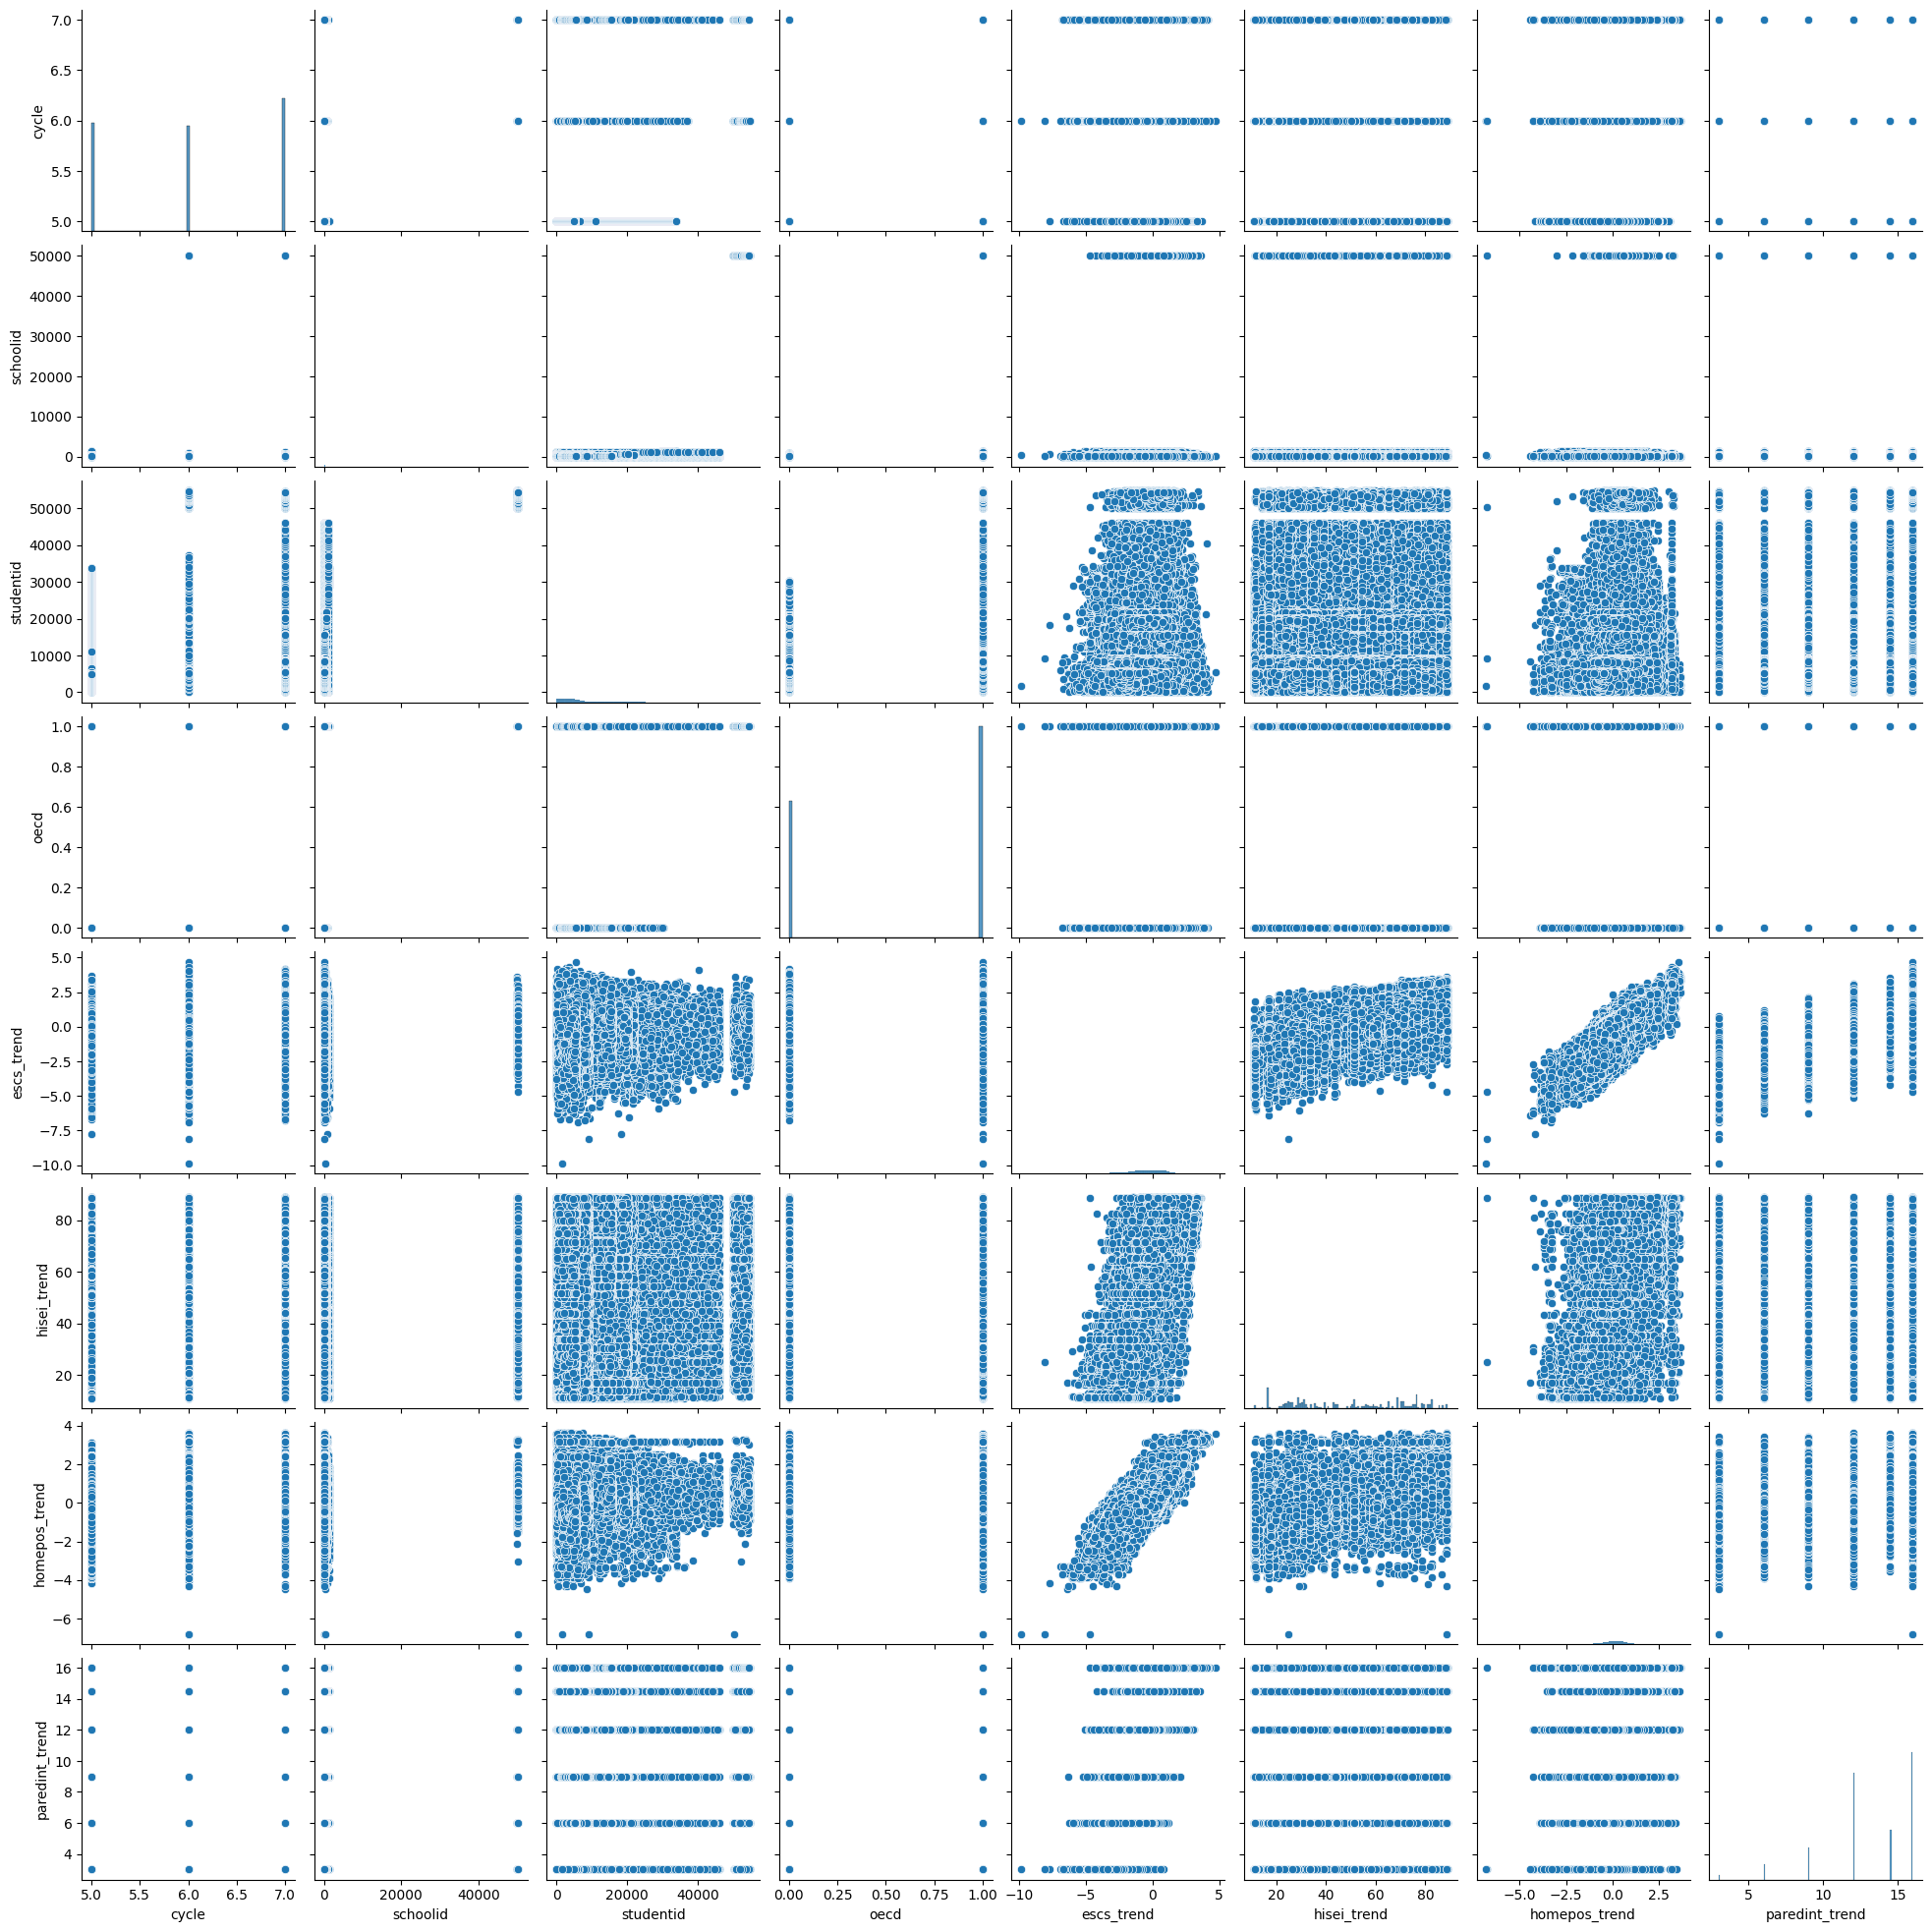

In [30]:
sb.pairplot(escsdata)

In [31]:
print('hello world')

hello world


In [ ]:
print('money bag yo')
print('money bag yo in the house')
print('send help')

money bag yo
money bag yo in the house
send help
